In [1]:
#importing the useful libraries
import sys
import scipy
import numpy as np
import seaborn as sn
import pandas as pd
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.plotting import scatter_matrix
from pandas import read_csv
import sklearn
from sklearn import datasets
from sklearn import *
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFECV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
!pip install plotnine
from plotnine import *
import matplotlib.pyplot as plt
import datetime
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
# if using a Jupyter notebook, include:
%matplotlib inline

In [27]:
df = pd.read_excel('data.xlsx')

In [28]:
df.shape

(59, 11)

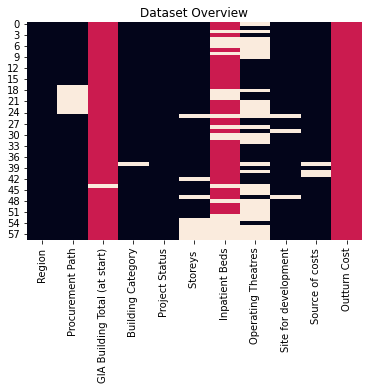

 categorical   Numeric   NaN 


In [29]:
#a heatmap to visualise which variables are categorical, which are Numeric and which have NAs
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
    
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
heatmap = df.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sn.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m categorical ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [30]:
df.describe

<bound method NDFrame.describe of                       Region Procurement Path  GIA Building Total (at start)  \
0                     London              P22                         4335.0   
1                     London              P21                        22945.0   
2                 South East              P21                         9200.0   
3                 South East              P21                         9109.0   
4                 North East              P22                        10536.0   
5                 North West              P21                         6710.0   
6                 North West              P21                        12232.0   
7                 North West              P21                        10996.0   
8                     London              P22                         3417.0   
9                 North West              P21                        12647.0   
10                North West            Other                        27670.0   
11    

In [31]:
# change unit of outturn_cost_gbp_uk 
df['Outturn Cost'] = df['Outturn Cost'] / (10**7)

In [32]:
df.columns = df.columns.str.strip() 
df.dropna()

# Cleaning the data
# Capitalise the word for each categorical variable 

df['Region'] = df['Region'].str.capitalize()
df['Procurement Path'] = df['Procurement Path'].str.capitalize()
df['Building Category'] = df['Building Category'].str.capitalize().str.strip()
df['Project Status'] = df['Project Status'].str.capitalize()
df['Site for development'] = df['Site for development'].str.capitalize()
df['Source of costs'] = df['Source of costs'].str.capitalize()
df.head()

,Region,Procurement Path,GIA Building Total (at start),Building Category,Project Status,Storeys,Inpatient Beds,Operating Theatres,Site for development,Source of costs,Outturn Cost
0,London,P22,4335.0,Mental health,Built,2.0,74.0,NaN,Hospital grounds,Trust cost plan,2.513311
1,London,P21,22945.0,District (medium),Built,5.0,101.0,8.0,Hospital grounds,Trust cost plan,10.393856
2,South east,P21,9200.0,Emergency centre,Built,3.0,NaN,NaN,Hospital grounds,Trust cost plan,3.509783
3,South east,P21,9109.0,District (medium),Under construction,4.0,48.0,6.0,Greenfield,Trust cost plan,6.397267
4,North east,P22,10536.0,Emergency centre,Built,1.0,NaN,NaN,Hospital grounds,Trust cost plan,2.308611


In [33]:
#returns the number of unique values for each column.
df.nunique()

Region                           14
Procurement Path                  7
GIA Building Total (at start)    57
Building Category                 7
Project Status                    2
Storeys                          14
Inpatient Beds                   32
Operating Theatres               10
Site for development              4
Source of costs                   9
Outturn Cost                     58
dtype: int64

<AxesSubplot:>

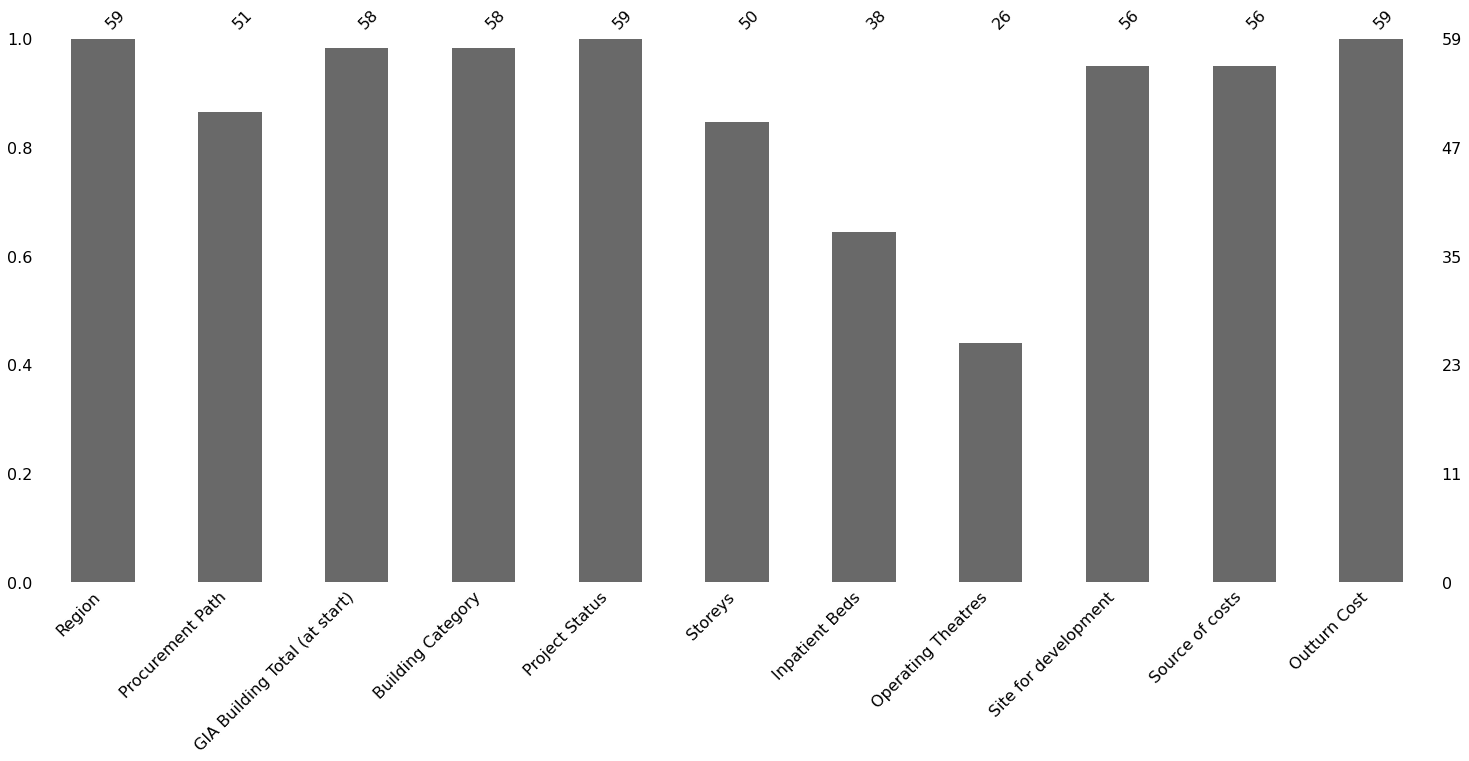

In [34]:
# Bar plot of missing values 
import missingno as msno
%matplotlib inline
msno.bar(df)

In [35]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()
df_num_corr

,GIA Building Total (at start),Storeys,Inpatient Beds,Operating Theatres,Outturn Cost
GIA Building Total (at start),1.000000,0.501605,0.954180,0.826950,0.883116
Storeys,0.501605,1.000000,0.369707,0.253213,0.558433
Inpatient Beds,0.954180,0.369707,1.000000,0.761135,0.758631
Operating Theatres,0.826950,0.253213,0.761135,1.000000,0.723774
Outturn Cost,0.883116,0.558433,0.758631,0.723774,1.000000


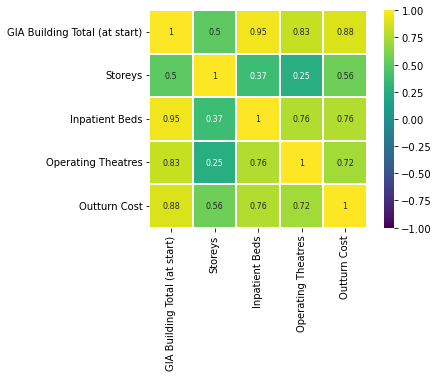

In [36]:
sn.heatmap(df_num_corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [37]:
# one-hot encoding to make categorical data numerical
# drop_first=true is used to break colliarity, as otherwise the linear model will be off
dfn = pd.get_dummies(df,drop_first=True)
dfn.shape

(59, 42)

In [38]:
# Replacing infinite with nan
dfn.replace([np.inf, -np.inf], np.nan, inplace=True)

In [39]:
# imputate by using median method
dfn['Storeys'] = dfn['Storeys'].fillna(dfn['Storeys'].median())
dfn['GIA Building Total (at start)'] = dfn['GIA Building Total (at start)'].fillna(dfn['GIA Building Total (at start)'].median())
dfn['Operating Theatres'] = dfn['Operating Theatres'].fillna(dfn['Operating Theatres'].median())
dfn['Inpatient Beds'] = dfn['Inpatient Beds'].fillna(dfn['Inpatient Beds'].median())


In [40]:
#splitting data into x and y
X = dfn.drop('Outturn Cost', axis=1)
y= dfn['Outturn Cost']

# rfe works by fitting the ml model, ranking features by importance, discarding the least important fetaure, re-fitting the model
# and then recursively doing this until the selected number of features is left

# implementing rfe using a linear model selecting top 10 features

# create pipeline
rfe = RFE(estimator=linear_model.LinearRegression(fit_intercept=False), n_features_to_select=10)
model = linear_model.LinearRegression(fit_intercept=False)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model using cross validation
# cv splits the data into 10 groups, then takes out one group to be the test data and evaluates it 
# this is repeated so each group is evaluated as the test data, and then the results of all are averaged
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -8.848 (3.912)


In [42]:
# we can now compare different algoritms to find one with the lowest MAE
# they have to be regression algorithms 
# the algorithm in the rfe also has to be 'A supervised learning estimator with a fit method that provides information about 
#                                          feature importance (e.g. coef_, feature_importances_).'
# https://scikit-learn.org/stable/supervised_learning.html this page lists all supervised learning algorithms in sklearn
# There may be more that could be tested

# get a list of models to evaluate
# we don't yet know the optimum number of features, so I have chosen 15 arbitrarily -this is about 35% of the features
# you don't want to include too many features as some can negatively affect the model's accuracy
def get_models():
	models = dict()
	# linear regresssion
	rfe = RFE(estimator=linear_model.LinearRegression(fit_intercept=False), n_features_to_select=25)
	model = linear_model.LinearRegression(fit_intercept=False)
	models['LR'] = Pipeline(steps=[('s',rfe),('m',model)])
	 #bayesian ridge regression
	rfe = RFE(estimator=linear_model.BayesianRidge(), n_features_to_select=10)
	model = linear_model.BayesianRidge()
	models['BRR'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10)
	model = DecisionTreeRegressor()
	models['CART'] = Pipeline(steps=[('s',rfe),('m',model)])
	# random forest
	rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
	model = RandomForestRegressor()
	models['RF'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gradient boosting machine
	rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10)
	model = GradientBoostingRegressor()
	models['GBM'] = Pipeline(steps=[('s',rfe),('m',model)])
	# support vector machine
	rfe = RFE(estimator=LinearSVR(random_state=0, tol=1e-5), n_features_to_select=10)
	model = LinearSVR(random_state=0, tol=1e-5)
	models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

 
# evaluate each model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
    
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>LR -8.738 (4.172)
>BRR -6.980 (2.676)
>CART -6.011 (2.949)
>RF -4.738 (2.259)
>GBM -4.781 (2.313)
>SVM -3.644 (1.721)


#### Multiple Linear Regression:

In [43]:
# split our data into training data and testing data for ML 
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

# print the info about the split data
print('x_train shape is',x_train.shape,'\nx_test shape is',x_test.shape)
print('y_train shape is',y_train.shape,'\ny_test shape is',y_test.shape)
print('y_train means are',round(np.mean(y_train), 3),'\ny_test mean is',round(np.mean(y_test), 3))

x_train shape is (44, 41) 
x_test shape is (15, 41)
y_train shape is (44,) 
y_test shape is (15,)
y_train means are 8.999 
y_test mean is 18.38


In [44]:
#scaling the data to remove outliers
#without scaling the model will be biased towards features with higher values ranges
scaler_x = preprocessing.RobustScaler(quantile_range=(25.0, 75.0)).fit(x_train)
scaler_y = preprocessing.RobustScaler(quantile_range=(25.0, 75.0)).fit(np.array(y_train).reshape(-1, 1)) 
x_train_s = scaler_x.transform(x_train)
y_train_s = scaler_y.transform(np.array(y_train).reshape(-1, 1))
x_test_s = scaler_x.transform(x_test)
y_test_s = scaler_y.transform(np.array(y_test).reshape(-1, 1))

#linear regression
#fit_intercept=False is used because of one-hot encoding
LRmodel = linear_model.LinearRegression(fit_intercept=False)
#fit the linear regression to our scaled training data
LRmodel.fit(x_train_s,y_train_s)

#we predict scaled y from our scaled test X
y_pred_scale = LRmodel.predict(x_test_s)
#then reverse the scaling on the prediction
y_pred =scaler_y.inverse_transform(y_pred_scale.reshape(-1,1)).reshape(-1)
#return the models prediction for the y_test data

In [45]:
# conevert to numpy values
y_test_a = y_test.to_numpy().flatten()

In [46]:
#a dataframe of the actual y values vs the predicted values
ap = pd.DataFrame({'Actual': y_test_a, 'Predicted': y_pred})
print(ap)

       Actual  Predicted
0   21.570970  26.158296
1    8.160000   2.957841
2   15.516577  31.323172
3   60.170703  53.325558
4   30.504953  19.635227
5    3.509783  -2.588019
6   16.370971  11.510574
7    0.935638   3.046592
8   16.330577  16.968205
9    3.520342   1.443514
10   2.308611  -5.936308
11  13.796094  13.761276
12  24.416002  26.927449
13  35.283332  17.169101
14  23.304108  24.967922


In [47]:
#R-squared is a statistical measure of how close the data are to the fitted regression line
#R-squared is between 0-1, and generally, the higher the R-squared, the better the model fits your data 
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))

# residuals
#residuals are the difference between the actual value and the predicted
#here we are calculating the residuals so we can plot them
residuals = y_test_a - y_pred
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = np.array(y_test_a)[max_idx], np.array(y_pred)[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

R2 (explained variance): 0.72
Mean Absolute Error (Σ|y-pred|/n): 6
Max Error: 18


In [52]:
import statsmodels.api as sm

# Assuming x_train_s is your scaled feature matrix and y_train_s is your scaled target variable

# Add a constant term to the features matrix (required for the intercept)
x_train_s = sm.add_constant(x_train_s)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_train_s, x_train_s).fit()

# Get the summary of the regression
summary = model.summary()

# Print the summary (this will include coefficients, p-values, and confidence intervals)
print(summary)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     31.52
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           4.46e-05
Time:                        17:07:19   Log-Likelihood:                 40.588
No. Observations:                  44   AIC:                            -7.177
Df Residuals:                       7   BIC:                             58.84
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1225      0.465     -0.263      0.8

In [54]:
# For test data

# Add a constant term to the features matrix (required for the intercept)
x_test_s = sm.add_constant(x_test_s)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_test_s, x_test_s).fit()

# Get the summary of the regression
summary = model.summary()

# Print the summary (this will include coefficients, p-values, and confidence intervals)
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                nan
Time:                        17:09:25   Log-Likelihood:                 462.25
No. Observations:                  15   AIC:                            -894.5
Df Residuals:                       0   BIC:                            -883.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957        inf          0        n

C:\Users\Shen_Y\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
C:\Users\Shen_Y\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Shen_Y\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Shen_Y\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Shen_Y\Anaconda3\lib\site-packages\statsmodels\base\model.py:1452: RuntimeWarning: invalid value encountered in multiply


In [55]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Log-transform numerical columns
df[numerical_columns] = np.log1p(df[numerical_columns])

# Display the first few rows of the transformed DataFrame
print(df.head())

       Region Procurement Path  GIA Building Total (at start)  \
0      London              P22                       8.374708   
1      London              P21                      10.040899   
2  South east              P21                       9.127067   
3  South east              P21                       9.117128   
4  North east              P22                       9.262648   

   Building Category      Project Status   Storeys  Inpatient Beds  \
0      Mental health               Built  1.098612        4.317488   
1  District (medium)               Built  1.791759        4.624973   
2   Emergency centre               Built  1.386294             NaN   
3  District (medium)  Under construction  1.609438        3.891820   
4   Emergency centre               Built  0.693147             NaN   

   Operating Theatres Site for development  Source of costs  Outturn Cost  
0                 NaN     Hospital grounds  Trust cost plan      1.256559  
1            2.197225     Hospital g

In [56]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()
df_num_corr

,GIA Building Total (at start),Storeys,Inpatient Beds,Operating Theatres,Outturn Cost
GIA Building Total (at start),1.000000,0.636391,0.718130,0.723591,0.907093
Storeys,0.636391,1.000000,0.305971,0.319546,0.615284
Inpatient Beds,0.718130,0.305971,1.000000,0.639374,0.568174
Operating Theatres,0.723591,0.319546,0.639374,1.000000,0.578375
Outturn Cost,0.907093,0.615284,0.568174,0.578375,1.000000


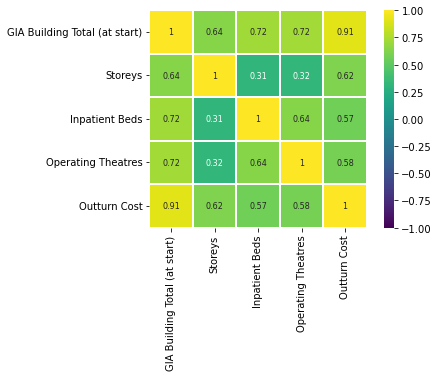

In [57]:
sn.heatmap(df_num_corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [58]:
#splitting data into x and y
X = dfn.drop('Outturn Cost', axis=1)
y= dfn['Outturn Cost']

# rfe works by fitting the ml model, ranking features by importance, discarding the least important fetaure, re-fitting the model
# and then recursively doing this until the selected number of features is left

# implementing rfe using a linear model selecting top 10 features

# create pipeline
rfe = RFE(estimator=linear_model.LinearRegression(fit_intercept=False), n_features_to_select=10)
model = linear_model.LinearRegression(fit_intercept=False)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model using cross validation
# cv splits the data into 10 groups, then takes out one group to be the test data and evaluates it 
# this is repeated so each group is evaluated as the test data, and then the results of all are averaged
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -8.848 (3.912)


In [59]:
# we can now compare different algoritms to find one with the lowest MAE
# they have to be regression algorithms 
# the algorithm in the rfe also has to be 'A supervised learning estimator with a fit method that provides information about 
#                                          feature importance (e.g. coef_, feature_importances_).'
# https://scikit-learn.org/stable/supervised_learning.html this page lists all supervised learning algorithms in sklearn
# There may be more that could be tested

# get a list of models to evaluate
# we don't yet know the optimum number of features, so I have chosen 15 arbitrarily -this is about 35% of the features
# you don't want to include too many features as some can negatively affect the model's accuracy
def get_models():
	models = dict()
	# linear regresssion
	rfe = RFE(estimator=linear_model.LinearRegression(fit_intercept=False), n_features_to_select=25)
	model = linear_model.LinearRegression(fit_intercept=False)
	models['LR'] = Pipeline(steps=[('s',rfe),('m',model)])
	 #bayesian ridge regression
	rfe = RFE(estimator=linear_model.BayesianRidge(), n_features_to_select=10)
	model = linear_model.BayesianRidge()
	models['BRR'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10)
	model = DecisionTreeRegressor()
	models['CART'] = Pipeline(steps=[('s',rfe),('m',model)])
	# random forest
	rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
	model = RandomForestRegressor()
	models['RF'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gradient boosting machine
	rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10)
	model = GradientBoostingRegressor()
	models['GBM'] = Pipeline(steps=[('s',rfe),('m',model)])
	# support vector machine
	rfe = RFE(estimator=LinearSVR(random_state=0, tol=1e-5), n_features_to_select=10)
	model = LinearSVR(random_state=0, tol=1e-5)
	models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

 
# evaluate each model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
    
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>LR -8.738 (4.172)
>BRR -6.980 (2.676)
>CART -6.138 (2.968)
>RF -4.681 (2.202)
>GBM -4.901 (2.517)
>SVM -3.644 (1.721)


In [60]:
#R-squared is a statistical measure of how close the data are to the fitted regression line
#R-squared is between 0-1, and generally, the higher the R-squared, the better the model fits your data 
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, y_pred)))

# residuals
#residuals are the difference between the actual value and the predicted
#here we are calculating the residuals so we can plot them
residuals = y_test_a - y_pred
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = np.array(y_test_a)[max_idx], np.array(y_pred)[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

R2 (explained variance): 0.72
Mean Absolute Error (Σ|y-pred|/n): 6
Max Error: 18


In [61]:
# For test data

# Add a constant term to the features matrix (required for the intercept)
x_test_s = sm.add_constant(x_test_s)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_test_s, x_test_s).fit()

# Get the summary of the regression
summary = model.summary()

# Print the summary (this will include coefficients, p-values, and confidence intervals)
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                nan
Time:                        10:10:03   Log-Likelihood:                 462.25
No. Observations:                  15   AIC:                            -894.5
Df Residuals:                       0   BIC:                            -883.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957        inf          0        n

C:\Users\Shen_Y\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
C:\Users\Shen_Y\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Shen_Y\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Shen_Y\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Shen_Y\Anaconda3\lib\site-packages\statsmodels\base\model.py:1452: RuntimeWarning: invalid value encountered in multiply


####SVM

In [65]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Standardize the features (recommended for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Initialize LinearSVR
linear_svr = LinearSVR(C=1.0)

# Train the model
linear_svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = linear_svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'MAE: {mae}')

Mean Squared Error: 183.23036922830016
MAE: 10.101963307223896


####BRR

In [67]:
!pip install pymc3
import numpy as np
import pymc3 as pm
import theano.tensor as tt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Standardize the features (recommended for Bayesian models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Define the Bayesian Ridge Regression model using PyMC3
with pm.Model() as bayesian_ridge_model:
    # Priors for regression coefficients and precision
    alpha = pm.Normal('alpha', mu=0, sd=1)
    beta = pm.Normal('beta', mu=0, sd=1, shape=X_train_scaled.shape[1])
    sigma = pm.HalfCauchy('sigma', beta=1)

    # Expected value of the outcome
    mu = alpha + pm.math.dot(X_train_scaled, beta)

    # Likelihood (sampling distribution) of observations
    likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=y_train)

    # Fit the model using Bayesian inference
    trace = pm.sample(1000, tune=1000)

# Plot the posterior distributions of parameters
pm.traceplot(trace)


  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529975 sha256=7fd57c49aefbae1d2b256edb67d78c39b6867bd2f324b1d121fde7df31cc4ff2
  Stored in directory: c:\users\shen_y\appdata\local\pip\cache\wheels\04\22\4d\832878ba2fe9ea3543f0189b9288a78e4aa4e0afc851a6890c
Successfully built theano-pymc
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Shen_Y\\Anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'pymc3'

### SVM

R-squared: 0.9816753120562418
CV mean score:  -2.3643588481966638
MSE:  183.2269537084123
RMSE:  91.61347685420616


C:\Users\Shen_Y\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
C:\Users\Shen_Y\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
C:\Users\Shen_Y\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
C:\Users\Shen_Y\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
C:\Users\Shen_Y\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
C:\Users\Shen_Y\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
C:\Users\Shen_Y\Anaconda3\lib\site-packages\sklearn\svm\_base.py

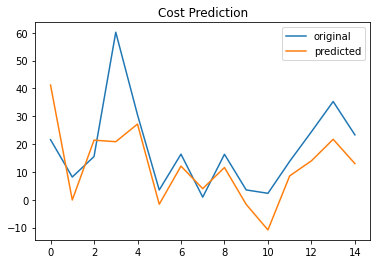

In [69]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Standardize the features (recommended for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


lsvr = LinearSVR(verbose=0)
lsvr.fit(X_train_scaled, y_train)

score = lsvr.score(X_train_scaled, y_train)
print("R-squared:", score)

cv_score = cross_val_score(lsvr, X, y, cv=10)
print("CV mean score: ", cv_score.mean())

ypred = lsvr.predict(X_test_scaled)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Cost Prediction")
plt.legend()
plt.show()


In [70]:
#In a linear model, such as LinearSVR, the coefficients represent the weights assigned to each feature.
#Larger absolute values of the coefficients indicate a stronger impact of the corresponding feature on the prediction. 
#Positive coefficients indicate a positive relationship, and negative coefficients indicate a negative relationship.

# Access feature coefficients
coefficients = lsvr.coef_

# Print feature importance (coefficients)
print("Feature Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

Feature Coefficients:
GIA Building Total (at start): 2.9106868803592127
Storeys: 3.3205780861609253
Inpatient Beds: 1.0145404099312296
Operating Theatres: 3.6024048944717824
Region_East of england: -0.04390192668962726
Region_International : -0.9050734409302634
Region_London: 0.16242096456674468
Region_North east: -0.7701693802093477
Region_North west: 0.135047965103746
Region_Northern ireland : -0.7472324102660248
Region_Scotland: 0.4882364435007856
Region_South east: 0.01026831787844746
Region_South west: 0.8119338926471997
Region_Wales: 1.1520048534162384
Region_West midlands: 0.767779317246413
Region_West yorkshire: -0.6519753523003531
Region_Yorkshire and the humber: 0.0
Procurement Path_P21: 0.7790821965048832
Procurement Path_P22: -0.3836724484680387
Procurement Path_Pfi: 1.2039703341740833
Procurement Path_Ppp: 0.0
Procurement Path_Prp: 1.2776023948196835
Procurement Path_Trad d&b: 0.5573871472208869
Building Category_District (medium): 0.06416493444650462
Building Category_Eme